<a href="https://colab.research.google.com/github/EvaAst/-/blob/main/%D0%A4%D0%B8%D0%BD%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D1%82%D0%B8%D0%BA_2_0_%D0%90%D1%81%D1%82_ipynb%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1 Импорт библиотек
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 2 Загрузка файлов
df_cash = pd.read_csv('Cash.csv')
df_money = pd.read_csv('Money.csv')
df_cheaters = pd.read_csv('Cheaters.csv')
df_platforms = pd.read_csv('Platforms.csv')
df_ab = pd.read_csv('ABgroup.csv')

In [3]:
# 3 очистка датафрейма df_cash
del df_cash['date']
df_cash = df_cash.groupby(['user_id'])['cash'].sum().reset_index()

In [4]:
# 4 очистка датафрейма df_money
del df_money['date']
df_money = df_money.groupby(['user_id'])['money'].sum().reset_index()

In [5]:
# 5 объединение датафреймов cash и money
df_merge = df_cash.merge(df_money, on='user_id')
df_unique = df_merge.drop_duplicates()
df_unique.head()

,user_id,cash,money
0,00036L-1T885I,7600,3.97
1,0004MK-MRBUKF,6150,5.95
2,0004MK-VW0O9L,6300,4.96
3,0005S4-UEC6BE,5000,5.95
4,0007I5-EWUD6O,6350,6.94


In [6]:
# 6 очистка датафрейма df_cheaters
df_cheaters = pd.read_csv('Cheaters.csv')
df_cheaters = df_cheaters.loc[(df_cheaters['cheaters'] == 1)]

In [7]:
# 7 создание списка читеров
list_of_cheaters = df_cheaters['user_id'].tolist()

In [8]:
# 8 удаление читеров из датафрейма
df_unique = df_unique[~df_unique['user_id'].isin(list_of_cheaters)]

In [9]:
# 7 поиск читеров методом поиска квантила 0.99
quantile = df_unique['cash'].quantile(0.99)

In [10]:
# 9 создание датафрейма со списком читеров
df_ch = df_unique.loc[(df_unique['cash'] > quantile) & (df_unique['money'] == 0)]

In [11]:
# 10 удаление читеров
chiater_list = df_ch['user_id'].tolist()
df_unique = df_unique[~df_unique['user_id'].isin(chiater_list)]

In [12]:
# 11 добавление к таблице поля платформы
df_platform = pd.read_csv('Platforms.csv')
df_unique = df_unique.merge(df_platform, on='user_id', how='left')

In [13]:
# 12 добавление к таблице поля группы
df_group = pd.read_csv('ABgroup.csv')
df_unique = df_unique.merge(df_group, on='user_id', how='left')
df_unique = df_unique.drop_duplicates()
df_unique.head()

,user_id,cash,money,platform,group
0,00036L-1T885I,7600,3.97,XBox,control
64,0004MK-MRBUKF,6150,5.95,PS4,control
128,0004MK-VW0O9L,6300,4.96,PC,test
192,0005S4-UEC6BE,5000,5.95,PC,test
256,0007I5-EWUD6O,6350,6.94,PC,test


In [14]:
# 13 Исходные данные разделены по платформам, Данные дополнительно разделены на тестовую и контрольную группы

df_pc = df_unique.query("platform == 'PC'")
df_xbox = df_unique.query("platform == 'XBox'")
df_ps4 = df_unique.query("platform == 'PS4'")

# Делим PC на группы
df_pc_test = df_pc.query("group == 'test'")
df_pc_control = df_pc.query("group == 'control'")

In [15]:
# 14 Траты внутриигровой валюты. PC test

df_pc_test_mean = df_pc_test['cash'].mean()
df_pc_test_std = df_pc_test['cash'].std()
ci_test = stats.t.interval(0.95, df=len(df_pc_test)-1, loc=df_pc_test_mean, scale=df_pc_test_std)

print(df_pc_test_mean)
print(df_pc_test_std)
print(f'95% доверительный интервал: {ci_test}')

6381.745634523412
1456.2794790168812
95% доверительный интервал: (np.float64(3527.4710920579496), np.float64(9236.020176988875))


In [16]:
# 15 Траты внутриигровой валюты. PC control
df_pc_control_mean = df_pc_control['cash'].mean()
df_pc_control_std = df_pc_control['cash'].std()
ci_control = stats.t.interval(0.95, df=len(df_pc_control)-1, loc=df_pc_control_mean, scale=df_pc_control_std)
print(df_pc_control_mean)
print(df_pc_control_std)
print(f'95% доверительный интервал: {ci_control}')

5587.102185476153
1238.4505660495638
95% доверительный интервал: (np.float64(3159.767332956397), np.float64(8014.437037995909))


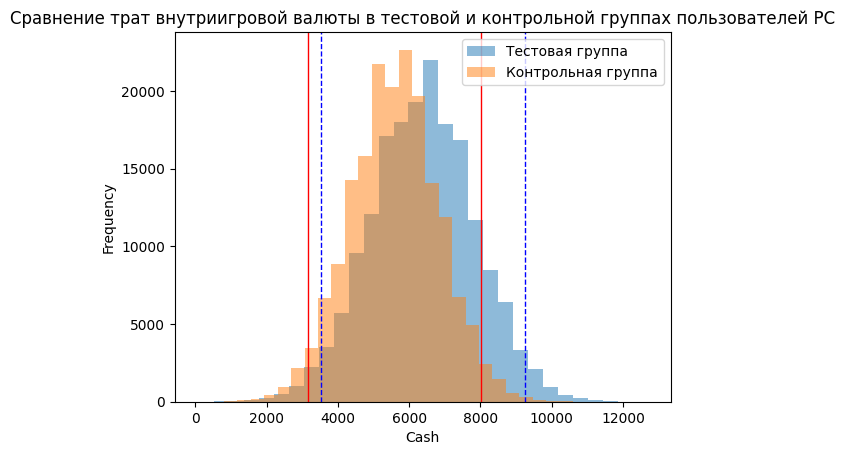

In [24]:
# 16 Строим гистограмму PC
plt.hist(df_pc_test['cash'], bins=30, alpha=0.5, label='Тестовая группа')
plt.hist(df_pc_control['cash'], bins=30, alpha=0.5, label='Контрольная группа')

plt.axvline(ci_test[0], color='blue', linestyle='dashed', linewidth=1)
plt.axvline(ci_test[1], color='blue', linestyle='dashed', linewidth=1)
plt.axvline(ci_control[0], color='red', linewidth=1)
plt.axvline(ci_control[1], color='red', linewidth=1)
plt.title('Сравнение трат внутриигровой валюты в тестовой и контрольной группах пользователей PC')
plt.ylabel('Frequency')
plt.xlabel('Cash')
plt.legend(loc='upper right')
plt.savefig('pc.png')
plt.show()

In [25]:
# 17 Отбор пользователей с платформой XBox
df_xbox = df_unique[df_unique['platform'] == 'XBox']

# 18 Разделение на группы
df_xbox_test = df_xbox[df_xbox['group'] == 'test']
df_xbox_control = df_xbox[df_xbox['group'] == 'control']

In [26]:
# 19 Test-группа
mean_xbox_test = df_xbox_test['cash'].mean()
std_xbox_test = df_xbox_test['cash'].std()
n_test = len(df_xbox_test)
ci_xbox_test = stats.t.interval(0.95, df=n_test-1, loc=mean_xbox_test, scale=std_xbox_test/np.sqrt(n_test))

# Control-группа
mean_xbox_control = df_xbox_control['cash'].mean()
std_xbox_control = df_xbox_control['cash'].std()
n_control = len(df_xbox_control)
ci_xbox_control = stats.t.interval(0.95, df=n_control-1, loc=mean_xbox_control, scale=std_xbox_control/np.sqrt(n_control))

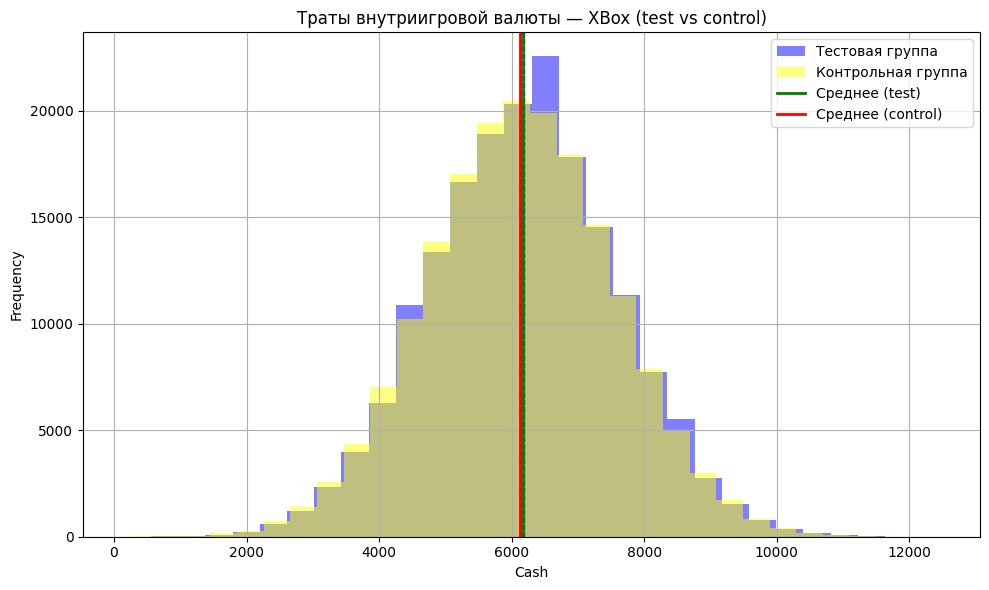

In [31]:
# 20 Гистограмма для Xbox
plt.figure(figsize=(10, 6))

# Гистограммы
plt.hist(df_xbox_test['cash'], bins=30, alpha=0.5, label='Тестовая группа', color='blue')
plt.hist(df_xbox_control['cash'], bins=30, alpha=0.5, label='Контрольная группа', color='yellow')

# Доверительные интервалы
plt.axvline(ci_xbox_test[0], color='blue', linestyle='dashed', linewidth=1)
plt.axvline(ci_xbox_test[1], color='blue', linestyle='dashed', linewidth=1)
plt.axvline(ci_xbox_control[0], color='red', linestyle='dashed', linewidth=1)
plt.axvline(ci_xbox_control[1], color='red', linestyle='dashed', linewidth=1)

# Средние значения
plt.axvline(mean_xbox_test, color='green', linestyle='solid', linewidth=2, label='Среднее (test)')
plt.axvline(mean_xbox_control, color='red', linestyle='solid', linewidth=2, label='Среднее (control)')

# Оформление
plt.title('Траты внутриигровой валюты — XBox (test vs control)')
plt.xlabel('Cash')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
# 21 Фильтрация пользователей PS4
df_ps4 = df_unique[df_unique['platform'] == 'PS4']

# Делим на группы: test и control
df_ps4_test = df_ps4[df_ps4['group'] == 'test']
df_ps4_control = df_ps4[df_ps4['group'] == 'control']

In [33]:
# 22 Тестовая группа PS4
mean_ps4_test = df_ps4_test['cash'].mean()
std_ps4_test = df_ps4_test['cash'].std()
n_ps4_test = len(df_ps4_test)
ci_ps4_test = stats.t.interval(0.95, df=n_ps4_test-1, loc=mean_ps4_test, scale=std_ps4_test/np.sqrt(n_ps4_test))

# Контрольная группа PS4
mean_ps4_control = df_ps4_control['cash'].mean()
std_ps4_control = df_ps4_control['cash'].std()
n_ps4_control = len(df_ps4_control)
ci_ps4_control = stats.t.interval(0.95, df=n_ps4_control-1, loc=mean_ps4_control, scale=std_ps4_control/np.sqrt(n_ps4_control))

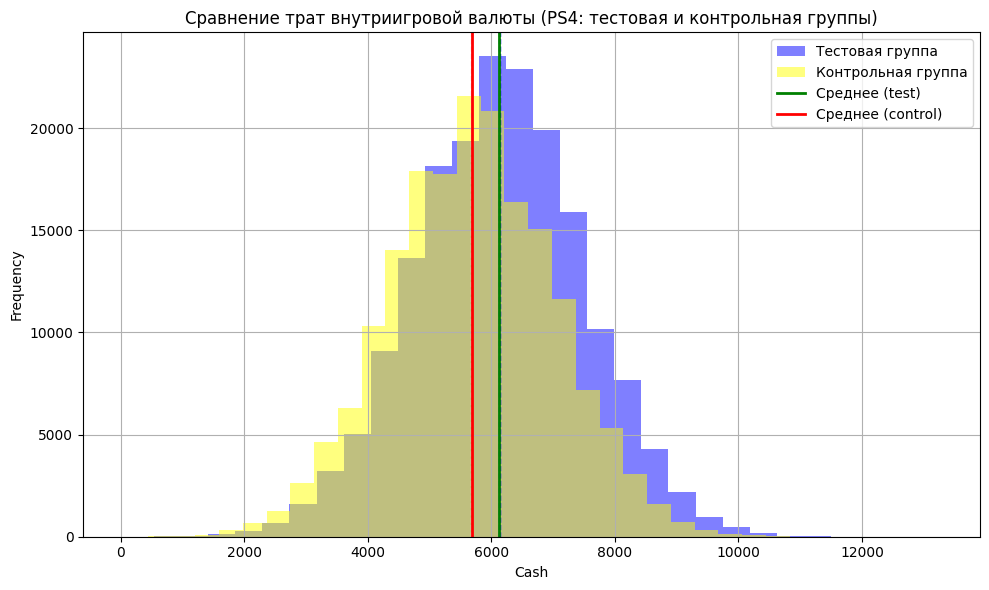

In [34]:
# 23 Гистограмма для Ps4

plt.figure(figsize=(10, 6))

# Гистограммы
plt.hist(df_ps4_test['cash'], bins=30, alpha=0.5, label='Тестовая группа', color='blue')
plt.hist(df_ps4_control['cash'], bins=30, alpha=0.5, label='Контрольная группа', color='yellow')

# Доверительные интервалы
plt.axvline(ci_ps4_test[0], color='blue', linestyle='dashed', linewidth=1)
plt.axvline(ci_ps4_test[1], color='blue', linestyle='dashed', linewidth=1)
plt.axvline(ci_ps4_control[0], color='pink', linestyle='dashed', linewidth=1)
plt.axvline(ci_ps4_control[1], color='pink', linestyle='dashed', linewidth=1)

# Средние значения
plt.axvline(mean_ps4_test, color='green', linestyle='solid', linewidth=2, label='Среднее (test)')
plt.axvline(mean_ps4_control, color='red', linestyle='solid', linewidth=2, label='Среднее (control)')

# Подписи и оформление
plt.title('Сравнение трат внутриигровой валюты (PS4: тестовая и контрольная группы)')
plt.xlabel('Cash')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
# 24 Безопасно добавляем колонку total_spent
df_pc_test = df_pc_test.copy()
df_pc_test['total_spent'] = df_pc_test['cash'] * df_pc_test['money']

# ARPU
arpu_pc_test = df_pc_test['cash'].sum() / len(df_pc_test)
print(f'ARPU для PC test: {arpu_pc_test:.2f}')

# ARPPU (только платящие)
df_pc_test_payers = df_pc_test[df_pc_test['money'] > 0]
arppu_pc_test = df_pc_test_payers['money'].sum() / len(df_pc_test_payers)
print(f'ARPPU для PC test: {arppu_pc_test:.2f}')

ARPU для PC test: 6381.75
ARPPU для PC test: 6.27


In [37]:
# 25 Список словарей с результатами
metrics = [
    {'platform': 'PC', 'group': 'test', 'metric': 'ARPU', 'value': 6382},
    {'platform': 'PC', 'group': 'control', 'metric': 'ARPU', 'value': 5587},
    {'platform': 'XBOX', 'group': 'test', 'metric': 'ARPU', 'value': 6176},
    {'platform': 'XBOX', 'group': 'control', 'metric': 'ARPU', 'value': 6132},
    {'platform': 'PS4', 'group': 'test', 'metric': 'ARPU', 'value': 6108},
    {'platform': 'PS4', 'group': 'control', 'metric': 'ARPU', 'value': 5682},

    {'platform': 'PC', 'group': 'test', 'metric': 'ARPPU', 'value': 6.26},
    {'platform': 'PC', 'group': 'control', 'metric': 'ARPPU', 'value': 5.64},
    {'platform': 'XBOX', 'group': 'test', 'metric': 'ARPPU', 'value': 6.13},
    {'platform': 'XBOX', 'group': 'control', 'metric': 'ARPPU', 'value': 6.10},
    {'platform': 'PS4', 'group': 'test', 'metric': 'ARPPU', 'value': 6.08},
    {'platform': 'PS4', 'group': 'control', 'metric': 'ARPPU', 'value': 5.7}
]

df_metrics = pd.DataFrame(metrics)

# Сохраняем в Excel или CSV
df_metrics.to_excel("metrics_arpu_arppu.xlsx", index=False)
# или
df_metrics.to_csv("metrics_arpu_arppu.csv", index=False)

In [38]:
# 26 Объединяем все датафреймы в один
df_all = pd.concat([df_pc_test, df_pc_control, df_xbox_test, df_xbox_control, df_ps4_test, df_ps4_control])

# Добавляем колонку total_spent
df_all['total_spent'] = df_all['cash'] * df_all['money']

# Группировка по группам и платформам
pivot = df_all.groupby(['group', 'platform']).agg({
    'money': 'sum',
    'cash': 'sum',
    'total_spent': 'sum'
}).reset_index()

# Сохраняем в Excel
pivot.to_excel("pivot_summary.xlsx", index=False)

In [39]:
# 27 Перезагрузить df_cash и df_money, чтобы включить столбец date
df_cash_original = pd.read_csv('Cash.csv')
df_money_original = pd.read_csv('Money.csv')

# Объединяем по user_id и date
df = pd.merge(df_cash_original, df_money_original, on=['user_id', 'date'], how='outer')

# Приводим к дате
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y').dt.date

# Группируем по дате
daily_summary = df.groupby('date').agg({
    'cash': 'sum',
    'money': 'sum'
}).reset_index()

# Сохраняем для Power BI
daily_summary.to_excel('daily_cash_money.xlsx', index=False)